In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("^GspC.csv")


In [130]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [131]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23362,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
23363,2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
23364,2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
23365,2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000
23366,2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000


In [132]:
sp = df.Close

In [133]:
sp.head()

0    17.660000
1    17.760000
2    17.719999
3    17.549999
4    17.660000
Name: Close, dtype: float64

Now we also use the index collumn from our initial dataframe.

In [147]:
sp.index = pd.to_datetime(df.Date)

In [135]:
sp.head()

Date
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
1928-01-05    17.549999
1928-01-06    17.660000
Name: Close, dtype: float64

In [136]:
def shift_n_absolute(ts, n):
    ts_shift = []
    for i in range(1,n+1):
        ts_shift.append((ts - ts.shift(periods=i))/ts)
    return ts_shift

def shift_n_absolute(ts, n):
    ts_shift = []
    for i in range(1,n+1):
        ts_shift.append((ts - ts.shift(periods=i)))
    return ts_shift

<AxesSubplot:xlabel='Date'>

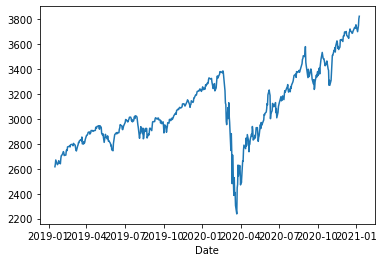

In [137]:
sns.lineplot(x=sp.index[-500:], y = sp.values[-500:])

In [138]:
n = 15 # the number of days that the S&P has to stay within the boundary
boundary = 3400
#sp = sp[:-1] #remove close

In [139]:
sp_shift = shift_n_absolute(sp, n)
shift_index = [str(x) for x in range(1,n+1)]
sp_shift = pd.DataFrame.from_dict(dict(zip(shift_index,sp_shift)))
sp_shift = sp_shift[n:]

In [140]:
sp_shift

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Date,,,,,,,,,,,,,,,
1928-01-23,0.009070,0.014739,0.021542,0.019274,0.019841,0.003401,0.009637,0.016440,0.015306,0.007936,-0.001134,0.005102,-0.004535,-0.006803,-0.001134
1928-01-24,0.003953,0.012987,0.018634,0.025409,0.023151,0.023715,0.007340,0.013552,0.020327,0.019198,0.011858,0.002823,0.009034,-0.000565,-0.002823
1928-01-25,-0.010845,-0.006849,0.002283,0.007991,0.014840,0.012557,0.013128,-0.003425,0.002854,0.009703,0.008562,0.001142,-0.007991,-0.001712,-0.011415
1928-01-26,0.006239,-0.004538,-0.000567,0.008508,0.014180,0.020987,0.018718,0.019285,0.002836,0.009075,0.015882,0.014747,0.007374,-0.001702,0.004538
1928-01-27,0.003392,0.009610,-0.001130,0.002827,0.011871,0.017524,0.024308,0.022046,0.022612,0.006218,0.012437,0.019220,0.018089,0.010741,0.001696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,-0.014976,-0.008482,-0.007131,-0.009379,-0.000651,0.002875,0.003618,0.001548,-0.002367,-0.005899,-0.000141,0.001629,0.014365,0.010050,0.008796
2021-01-05,0.007033,-0.007838,-0.001390,-0.000048,-0.002281,0.006386,0.009888,0.010626,0.008570,0.004682,0.001175,0.006893,0.008651,0.021297,0.017012
2021-01-06,0.005677,0.012670,-0.002116,0.004295,0.005629,0.003410,0.012027,0.015509,0.016243,0.014199,0.010333,0.006846,0.012532,0.014279,0.026853


<AxesSubplot:xlabel='Date'>

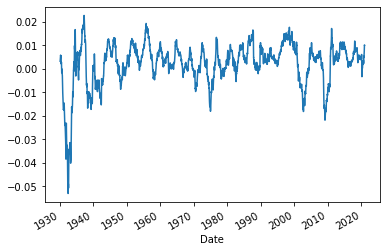

In [141]:
sp_shift["15"].rolling(window=500).mean().plot()

In [142]:
sp[-5:]

Date
2021-01-04    3700.649902
2021-01-05    3726.860107
2021-01-06    3748.139893
2021-01-07    3803.790039
2021-01-08    3824.679932
Name: Close, dtype: float64

In [143]:
sp_pre_forecast = float(sp[-1:]) + sp_shift * float(sp[-1:])

In [144]:
# "windows" is the number of days we look back in time how values
# were excedet in the past

#windows = 350
sp_forecast = sp_pre_forecast

In [145]:
float(sp[-1:])

3824.679932

probability of going below boundary
0.027706406303528604


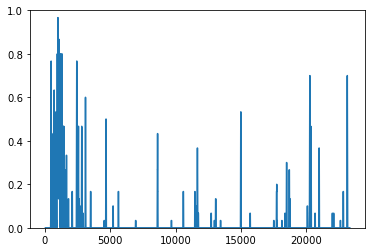

In [146]:
#computing the probability of exceeding "boundry"

win = []
if float(sp[-1:]) < boundary:
    print("probability of going above boundary")
    for i in range(len(sp_forecast)):
        win.append(any(sp_forecast.iloc[i] > boundary)) 
else:
    print("probability of going below boundary")
    for i in range(len(sp_forecast)):
        win.append(any(sp_forecast.iloc[i] < boundary))
win = pd.Series(win)
print(win.mean())
win.rolling(window=30).mean().plot()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()